## Central Limit Theorem

As the number of samples taken from population increases, the distribution of the sample means tend to follow normal distribution

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
def create_samples(num,size):
    '''
    Function to create 'num' number of samples of size 'size'
    '''
    return np.random.randint(1,100000,size=(num,size)) 
def get_sample_mean(arr):
    '''
    Function to get mean of an array
    '''
    return [np.mean(arr[i]) for i in range(len(arr))]

Please enter number of samples you want : 10000
Please enter size of each samples you want : 200


(array([   5.,   33.,  266., 1133., 2505., 3107., 2029.,  778.,  131.,
          13.]),
 array([41166.165, 42826.277, 44486.389, 46146.501, 47806.613, 49466.725,
        51126.837, 52786.949, 54447.061, 56107.173, 57767.285]),
 <a list of 10 Patch objects>)

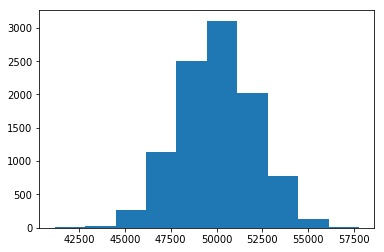

In [2]:
num = int(input('Please enter number of samples you want : '))
size = int(input('Please enter size of each samples you want : '))
X = create_samples(num,size)
y = get_sample_mean(X)
plt.hist(y)

## Pearson's Correlation Coefficient

$r=\frac{\sum_{i=1}^n ((x_i - x)(y_i - y)) }{\sqrt{\sum_{i=1}^n ((x_i - x)^2(y_i - y)^2))}}$    , $r^2$ is coefficient of determination which gives proportion of varaince that is shared by both variables.

Here, 'x' is the mean of values $x_1$ to $x_n$ and similarly 'y' is mean of y values

Above formula can also be written as :
$r=\frac{\sum_{i=1}^n (C_{ij}) }{\sqrt{\sum_{i=1}^n (C_{ii}^2 C_{jj}^2)}}$

Here $C_{ij}$ , $C_{ii}$ and $C_{jj}$ are Covariance of variables ij , ii and jj respectively.
Like Variance means how a variable varies, covariance means how two variables vary together.

$Cov_{ij}=\frac{\sum_{i=1}^n (x-\mu)(y-v)}{n-1}$
But this does not interpret how strongly the two dataset are related.

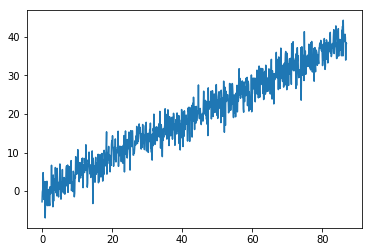

In [5]:
import numpy as np
import pandas as pd
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
%matplotlib inline
var_df = pd.read_csv("C://Users/Vipul.joshi/Downloads/pearson_coefficient.txt",sep='\t',header=None)
X = var_df[0]
Y = var_df[1]
plt.plot(X,Y)

In [6]:
def pearson_coef(arr,arr1):
    '''
    Function to calculate pearson coefficient
    '''
    x = np.mean(arr)
    y = np.mean(arr1)
    #Uppar part of pearson coefficient formula
    m = np.sum(np.array([(i-x) for i in arr])*np.array([(j-y) for j in arr1]))
    #Denominator of perason coefficient Formula
    n = np.sqrt(np.sum(np.array([(i-x)**2 for i in arr]))*np.sum(np.array([(j-y)**2 for j in arr1])))
    r = m/n
    return r
    

In [7]:
from scipy.stats.stats import pearsonr
print('The two dataset are strongly related as indicated by the value of Pearson Coefficient r : {}'.format(pearson_coef(X,Y)))
print(pearsonr(X,Y))

The two dataset are strongly related as indicated by the value of Pearson Coefficient r : 0.9723599887024701
(0.97235998870247, 0.0)


In [13]:
def Pearson(x,y):
    x_mean = np.mean(x)
    y_mean = np.mean(y)
    term1  = x - x_mean
    term2  = y - y_mean
    num_   = np.multiply(term1,term2)
    num_   = num_.sum()
    term3  = np.power(term1,2)
    term4  = np.power(term2,2)
    den_   = np.sqrt(np.sum(term3))*np.sqrt(np.sum(term4))
    return np.divide(num_,den_)

In [14]:
Pearson(X,Y)

0.97235998870247

In [15]:
%%timeit
Pearson(X,Y)

1.05 ms ± 33.2 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [16]:
%%timeit
pearson_coef(X,Y)


971 µs ± 30.4 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
